In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


t: 0.114 [s], Average temperature: 44.00 Celsius


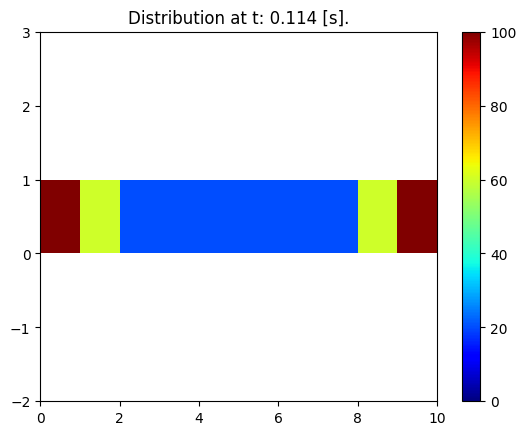

t: 0.227 [s], Average temperature: 48.00 Celsius


<Figure size 640x480 with 0 Axes>

t: 0.341 [s], Average temperature: 52.00 Celsius


<Figure size 640x480 with 0 Axes>

t: 0.455 [s], Average temperature: 55.00 Celsius


<Figure size 640x480 with 0 Axes>

t: 0.568 [s], Average temperature: 58.00 Celsius


<Figure size 640x480 with 0 Axes>

t: 0.682 [s], Average temperature: 60.50 Celsius


<Figure size 640x480 with 0 Axes>

t: 0.795 [s], Average temperature: 63.00 Celsius


<Figure size 640x480 with 0 Axes>

t: 0.909 [s], Average temperature: 65.19 Celsius


<Figure size 640x480 with 0 Axes>

t: 1.023 [s], Average temperature: 67.34 Celsius


<Figure size 640x480 with 0 Axes>

t: 1.136 [s], Average temperature: 69.28 Celsius


<Figure size 640x480 with 0 Axes>

t: 1.250 [s], Average temperature: 71.16 Celsius


<Figure size 640x480 with 0 Axes>

t: 1.364 [s], Average temperature: 72.88 Celsius


<Figure size 640x480 with 0 Axes>

t: 1.477 [s], Average temperature: 74.54 Celsius


<Figure size 640x480 with 0 Axes>

t: 1.591 [s], Average temperature: 76.06 Celsius


<Figure size 640x480 with 0 Axes>

t: 1.705 [s], Average temperature: 77.51 Celsius


<Figure size 640x480 with 0 Axes>

t: 1.818 [s], Average temperature: 78.86 Celsius


<Figure size 640x480 with 0 Axes>

t: 1.932 [s], Average temperature: 80.14 Celsius


<Figure size 640x480 with 0 Axes>

t: 2.045 [s], Average temperature: 81.33 Celsius


<Figure size 640x480 with 0 Axes>

t: 2.159 [s], Average temperature: 82.46 Celsius


<Figure size 640x480 with 0 Axes>

t: 2.273 [s], Average temperature: 83.52 Celsius


<Figure size 640x480 with 0 Axes>

t: 2.386 [s], Average temperature: 84.51 Celsius


<Figure size 640x480 with 0 Axes>

t: 2.500 [s], Average temperature: 85.45 Celsius


<Figure size 640x480 with 0 Axes>

t: 2.614 [s], Average temperature: 86.33 Celsius


<Figure size 640x480 with 0 Axes>

t: 2.727 [s], Average temperature: 87.15 Celsius


<Figure size 640x480 with 0 Axes>

t: 2.841 [s], Average temperature: 87.93 Celsius


<Figure size 640x480 with 0 Axes>

t: 2.955 [s], Average temperature: 88.65 Celsius


<Figure size 640x480 with 0 Axes>

t: 3.068 [s], Average temperature: 89.34 Celsius


<Figure size 640x480 with 0 Axes>

t: 3.182 [s], Average temperature: 89.98 Celsius


<Figure size 640x480 with 0 Axes>

t: 3.295 [s], Average temperature: 90.58 Celsius


<Figure size 640x480 with 0 Axes>

t: 3.409 [s], Average temperature: 91.15 Celsius


<Figure size 640x480 with 0 Axes>

t: 3.523 [s], Average temperature: 91.69 Celsius


<Figure size 640x480 with 0 Axes>

t: 3.636 [s], Average temperature: 92.19 Celsius


<Figure size 640x480 with 0 Axes>

t: 3.750 [s], Average temperature: 92.66 Celsius


<Figure size 640x480 with 0 Axes>

t: 3.864 [s], Average temperature: 93.10 Celsius


<Figure size 640x480 with 0 Axes>

t: 3.977 [s], Average temperature: 93.52 Celsius


<Figure size 640x480 with 0 Axes>

t: 4.091 [s], Average temperature: 93.91 Celsius


<Figure size 640x480 with 0 Axes>

In [18]:
#Defin our problem
#diffusivity of rod, theoretical amount below, insert appropriate coef. for material in question. mm^2/s
a = 110
#length of rod in mm
length = 50
#time for temperature to diffuse in seconds
time = 4
#nodes on the rod, "cut" it up into segments so we can handle finite number of sections. More nodes, more precise
nodes = 10

#Initialization
dx = length / nodes
#dt derived from stability analysis of this finite difference to ensure numerical solution is stable and not too fast.
dt = .5 * dx**2 / a
t_nodes = int(time/dt)
#temperature at the ends of the rod must be known and distribution of temp before time starts must be known.
u = np.zeros(nodes) + 20 #Rod is initially at 20°C 
#Bound Initial Conditions, temp in C
u[0] = 100
u[-1] = 100

#Simulation
fig, axis = plt.subplots()

pcm = axis.pcolormesh([u], cmap = plt.cm.jet, vmin = 0, vmax = 100)
plt.colorbar(pcm, ax = axis)
axis.set_ylim([-2,3])

counter = 0

plt.ion()

while counter < time:
    w = u.copy()
    for i in range(1, nodes-1):
        u[i] = dt * a * (w[i-1]-2*w[i]+w[i+1]) / dx**2 + w[i] #derived from differential scheme
    counter += dt
    print("t: {:.3f} [s], Average temperature: {:.2f} Celsius".format(counter, np.average(u)))

    #update plot after each iteration

    pcm.set_array([u])
    axis.set_title("Distribution at t: {:.3f} [s].".format(counter))
    plt.draw()
    plt.pause(.01) #every 10 ms

plt.ioff()
plt.show()
    